# IBOV Machine Learning Analysis

Este notebook realiza uma análise exploratória e preditiva sobre o dataset refinado do índice IBOVESPA, 
gerado a partir do pipeline de dados do projeto **b3-dataflow-aws-batch**.

Etapas:
1. Leitura e inspeção do dataset refinado (`ibov_refined.parquet`);
2. Visualização da evolução semanal do preço médio de fechamento;
3. Treinamento de um modelo de regressão linear simples com `scikit-learn` 
   para avaliar a relação entre a variação média diária e o preço médio semanal.


In [1]:
# ====================================================================
# BLOCO 1 — Leitura do dataset refinado e estatísticas descritivas
# ====================================================================

import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams["font.family"] = "DejaVu Sans"

# Detecta automaticamente o diretório base (raiz do projeto)
base_dir = os.path.abspath("..")
path = os.path.join(base_dir, "data", "refined", "ibov_refined.parquet")

print("📍 Caminho detectado:", path)

# Lê o parquet refinado gerado pelo Glue Job (local ou na AWS)
df = pd.read_parquet(path)

print("\n📊 Informações do dataset:")
print(df.info())

print("\n📈 Estatísticas descritivas:")
print(df.describe())


📍 Caminho detectado: C:\Users\Ayla\Desktop\MLFIAP\Fase 2 - Big Data Architecture\Tech Challenge 2\b3-dataflow-aws-batch\data\refined\ibov_refined.parquet

📊 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semana                  6 non-null      UInt32 
 1   media_preco_fechamento  6 non-null      float64
 2   soma_volume_negociado   6 non-null      int64  
 3   media_variacao_diaria   6 non-null      float64
dtypes: UInt32(1), float64(2), int64(1)
memory usage: 306.0 bytes
None

📈 Estatísticas descritivas:
         semana  media_preco_fechamento  soma_volume_negociado  \
count       6.0                6.000000           6.000000e+00   
mean       39.5           143698.477778           5.745218e+07   
std    1.870829             1802.461487           3.475578e+07   
min        37.0           141783.0000

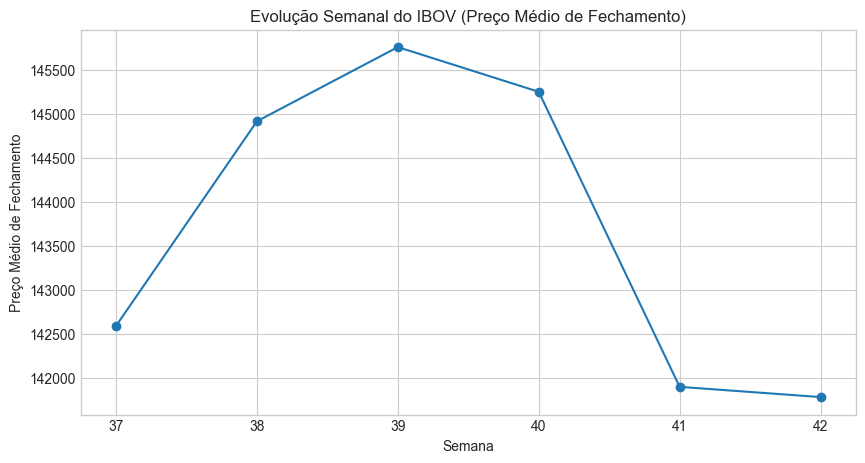

In [2]:
# ====================================================================
# BLOCO 2 — Visualização da evolução semanal (gráfico de tendência)
# ====================================================================

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(df["semana"], df["media_preco_fechamento"], marker="o", color="tab:blue")

plt.title("Evolução Semanal do IBOV (Preço Médio de Fechamento)")
plt.xlabel("Semana")
plt.ylabel("Preço Médio de Fechamento")
plt.grid(True)
plt.show()


Coeficiente R² do modelo: -0.5049


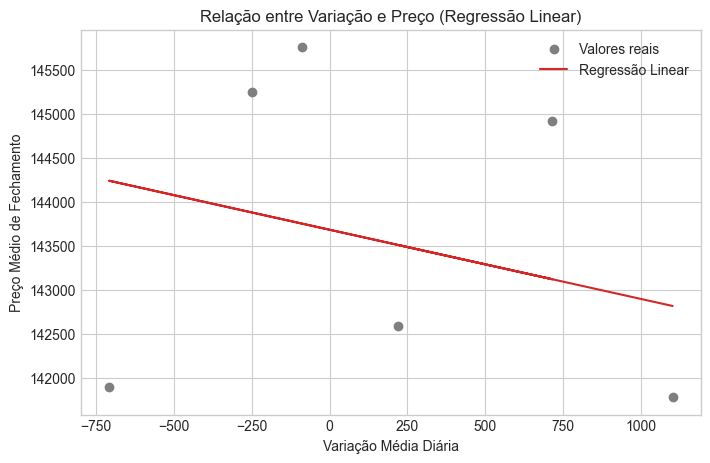

In [3]:
# ====================================================================
# BLOCO 3 — Modelo de Regressão Linear simples (scikit-learn)
# ====================================================================
# O objetivo é prever o preço médio semanal a partir da variação média diária.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Remove possíveis valores nulos
df = df.dropna(subset=["media_preco_fechamento", "media_variacao_diaria"])

# Define variáveis de entrada (X) e saída (y)
X = df[["media_variacao_diaria"]]
y = df["media_preco_fechamento"]

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina o modelo de regressão linear
model = LinearRegression().fit(X_train, y_train)

# Avalia o modelo
r2 = model.score(X_test, y_test)
print(f"Coeficiente R² do modelo: {r2:.4f}")

# Exibe relação real x predita
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="tab:gray", label="Valores reais")
plt.plot(X, model.predict(X), color="tab:red", label="Regressão Linear")
plt.xlabel("Variação Média Diária")
plt.ylabel("Preço Médio de Fechamento")
plt.title("Relação entre Variação e Preço (Regressão Linear)")
plt.legend()
plt.show()


## Resultados e Conclusões

**1. Evolução semanal:**
O preço médio de fechamento do IBOVESPA apresentou tendência de alta até a semana 39, 
seguida por queda acentuada nas semanas 41 e 42. 
Isso indica um comportamento de volatilidade no período analisado.

**2. Modelo de Regressão Linear:**
O modelo apresentou um coeficiente de determinação (R²) negativo, o que indica 
que a variação média diária não possui relação linear significativa com o preço médio semanal.

Essa limitação é esperada, pois o dataset contém apenas seis observações 
e a relação entre variação e preço é fortemente influenciada por outros fatores de mercado.

**3. Interpretação:**
Este modelo simples demonstra a capacidade do pipeline em gerar dados limpos, 
refinados e prontos para análise e experimentação com modelos de Machine Learning.

**4. Próximos passos:**
- Aumentar a janela temporal para incluir mais semanas e meses;
- Testar modelos mais robustos (como regressão múltipla, Random Forest ou ARIMA);
- Aplicar técnicas de detecção de anomalias com séries temporais.